In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# what is credit card fraud ?
It is the type of transaction done by unauthorised party 

credit card fraud is a serious problem which one or less faced by each and every country around the globe. It is the matter of concern so proper steps is required to deal with the issue. Moreover it can be done by implementing machine learning algorithims and building model that can detect the fraudal transaction and track those cyber criminals and this ic called credit card fraud detection. 

# Problem statement - to detect credit card fraudal transaction.

to deal with that we are using European card holders data set wherein v1,v2,v2 are the features which are already convert by PCA for confidential concern along with that we have two more columns ie time and amount. And using this we are trying to build our model. 

# steps which we will follow to deal the problem statement 

1. Reading and understaing data
2. Visualization of data
3. Standardization of columns if required 
4. Dealing with imbalance class using resampling technique (synthetic minority oversampling technique)
5. Building model (XGboost classifier)
6. Checking accuracy

# what is boosting ?
Boosting is an essential model which works on sequential process wherein, each subequent model attempts to correct error caused by previous model.Moreover, succeding model is dependent on the previous model. 
Basically it is a technique in which we are trying to creat numbers of weak learner and at the end we are combining the result of weak learner to build a strong model. 

# Tpyes of Boosting:
1. Gradient boosting 
2. AdaGradient boosting
3. XGboosting

# XGboosting

It is advance implementation of gradient descent algorithm. It is highly used boosting technique in Machine learninng. 
XGboost is 10 times faster than other gradient boosting technique. 
It also includes variety of regularizations which reduce overfitting and dimprove the overall performance of model. 
Following are the steps perfomed by XGboost
1. Regularization
2. Parallel processsing
3. High fleibility 
4. Handling missing data 
5. Tree pruning
6. Built in cross validation 

# what is imbalance data ?

Imbalance data are those in which there is uneven distribution of observation among majority and minority class. Even though we are getting good accuracy that doesnt mean we are 100 perfect there is a chance of imbalance in the data set when it of data like fraud, diseases, defects etc. so to ensure our model is working perfectly we must calcuate F1 score and recall which give further clearence. 

# Technique to over come 
1. under sampling --> removing random records from the majority class, which can cause loss of information. 
2. over sampling --> is to duplicate records from minority class

In our model we have used Oversampling with SMOTE(Synthetic Minority Oversampling Technique) --> in this technique randomly  point is picked from minority class futher, k nearest neigbhours are calcuted for that point and then synthetic points are added between the choosen points and its neighbours. 




In [2]:
# to read the data set
df=pd.read_csv('../input/creditcardfraud/creditcard.csv')

# data reading and understanding 

In [3]:
#check the rows and columns in data set 
df.shape

(284807, 31)

In [4]:
# it gives detailed information about the data set starting from info about column name total rows in data total no of information in data set
# information about data types, null values etc. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# this function is used to display top 5 values of data untill we are specifying some value like head(10) it will give top 10 value and just 
# oppsite to this function is tail () function it give last 5 values until we specify some values 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# to check whether there is some missing values in the data set 
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# data visualization 


CASE COUNT
--------------------------------------------
Total number of cases are 284807
Number of Non-fraud cases are 284315
Number of fraud cases are 492
Percentage of Non-fraud cases is 99.82725143693798 % of total
Percentage of fraud cases is 0.1727485630620034 % of total


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'samples')

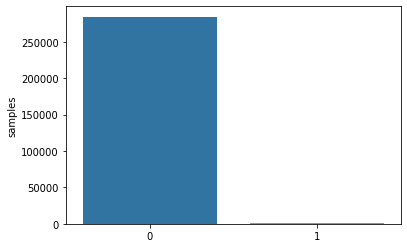

In [7]:
# here we are trying to understand the distribution of oservation in class column are it is a data set related to fraud so there is chance of 
# imbalance of observation in the column 

import matplotlib.pyplot as plt
import seaborn as sns
fraud_count = len(df[df.Class == 1])
none_fraud_count = len(df[df.Class == 0])

print('CASE COUNT')
print('--------------------------------------------')
print('Total number of cases are {}'.format(len(df)))
print('Number of Non-fraud cases are {}'.format(none_fraud_count))
print('Number of fraud cases are {}'.format(fraud_count))

print('Percentage of Non-fraud cases is {} % of total'.format((none_fraud_count/len(df['Class'])*100)))

print('Percentage of fraud cases is {} % of total'.format((fraud_count/len(df['Class'])*100)))


x=df.Class.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

from the above barplot we can confidently add that there is a imbalance in the data set here percentage of majority class is 99.83% whereas percentage of minority is only 0.17% so there is a huge imbalanace in the data set and it need to be adressed in order to get accuracy percission and better performance. 

In [8]:
nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

In [9]:
nonfraud_cases.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [10]:
fraud_cases.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [11]:
# as we can see that exceopt amount column all the other features variables are in standard formate so to bring all the features in the same sacle 
# for the ease of calculation we are converting the amount column into standard formate using standard scaler function
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

amount = df['Amount'].values

df['Amount'] = scaler.fit_transform(amount.reshape(-1, 1))

print(df['Amount'].head(10))

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


In [12]:
# we are assigning values to variable x and y 
X = df.drop('Class', axis = 1).values
y = df['Class'].values

In [13]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)


print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 284315, 1: 284315})


In the above step we are dealing with class imbalance using oversampling with SMOTE to bring balance in the majority and minority class

# test train split and model building

In [14]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn.metrics import accuracy_score,roc_auc_score,precision_score, recall_score,f1_score,classification_report

In [15]:

X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote ,test_size=.33, random_state=7)

In [16]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:33:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [17]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [18]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.98%


In [19]:
precision = precision_score(y_test, predictions)
print("Precision : %.2f%%" % (precision * 100.0))

Precision : 99.97%


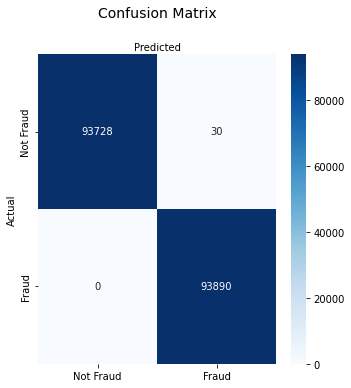

In [20]:
c_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))

sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="Blues" ,fmt='g',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],)
ax1.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1,fontsize=14)
plt.show()

here we are getting pretty much good accuracy of 99.99% along with good precision percentage of 99.97% 
the model is able to correctly predicting data as not fraud as not fraud 93731 time and not fraud as fraud 27 times
futhermore, model is correcttly predicting fraud as fraud 93890 times and wrongly predict fraud as not fraud 0 time that means we can say we are almost 100% accurate in predicting fraud as fraud 

In [21]:
recall = recall_score(y_test, y_pred)
print("Recall : ",recall )


#F1 SCORE

f1score = f1_score(y_test,y_pred, average='macro')
print("F1 Score : ",f1score )

Recall :  1.0
F1 Score :  0.9998401260745673
